# DS life cycle project
understand the problem

get data

check data

EDA

Data preprocessing

Model Training

chose the model

# Data Description -> means understand the data 

- work_year ->	The year the salary was paid.

- experience_level ->	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

- employment_type ->	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

- job_title ->	The role worked in during the year.

- salary	 -> The total gross salary amount paid.

- salary_currency ->	The currency of the salary paid as an ISO 4217 currency code.

- salary_in_usd ->	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

- employee_residence ->	Employee's primary country of residence in during the work year as an ISO 3166 country code.

- remote_ratio ->	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

- company_location ->	The country of the employer's main office or contracting branch as an ISO 3166 country code.

- company_size ->	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [1]:
# import the necessary libaray 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("ds_salaries.csv")


In [4]:
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# remove the unnamed columns because is replucated to the index
ds.drop("Unnamed: 0", inplace = True, axis = 1)

In [6]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [15]:
ds.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


# preprocessing Data

In [16]:
# take look about information of data 
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [17]:
# this for know what data more repeat per each feature  
ds.mode()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022.0,SE,FT,Data Scientist,80000,USD,100000.0,US,100.0,US,M
1,NaN,NaN,NaN,NaN,100000,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ds.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
# Splitting categorical and numerical columns
categorical_columns = ds.select_dtypes(include=['object']).columns
numerical_columns = ds.select_dtypes(include=['int', 'float']).columns

In [27]:
def Cat_Viwe():
    for cat in categorical_columns:
        print(f"{cat} :\n---------------- \n{ds[cat].value_counts()}")
        print(f"the unique value is : {ds[cat].unique()}")
        print(f"the number of unique value is : {ds[cat].nunique()}")
        print("==" * 40)

In [22]:
categorical_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [10]:
numerical_columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [24]:
def Num_Viwe():
    for num in numerical_columns:
        print(f"{num} : \n----------------\n{ds[num].value_counts()}")
        print(f"the number of unique value is : {ds[num].nunique()}")
        print("==" * 40)

# Data Cleaning 

In [30]:
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [32]:
# I have duplicated data 
ds.duplicated().sum()

42

In [11]:
# show the duplicated data 
ds[ds.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [13]:
ds_without_dup = ds.drop_duplicates()

In [16]:
ds_without_dup.duplicated().sum()

0

# Study for each feature 

## Start with numerical data 

In [29]:
Num_Viwe()

work_year : 
----------------
2022    318
2021    217
2020     72
Name: work_year, dtype: int64
the number of unique value is : 3
salary : 
----------------
100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: salary, Length: 272, dtype: int64
the number of unique value is : 272
salary_in_usd : 
----------------
100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64
the number of unique value is : 369
remote_ratio : 
----------------
100    381
0      127
50      99
Name: remote_ratio, dtype: int64
the number of unique value is : 3


In [30]:
ds[['salary_in_usd', 'salary' ]].head()

,salary_in_usd,salary
0,79833,70000
1,260000,260000
2,109024,85000
3,20000,20000
4,150000,150000


In [31]:
def His_Num():
    for n in numerical_columns:
        plt.hist(ds[n], bins=15, edgecolor='black')

  # Adding labels and title
        plt.xlabel(n)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {n}')

      # Display the histogram
        plt.show()

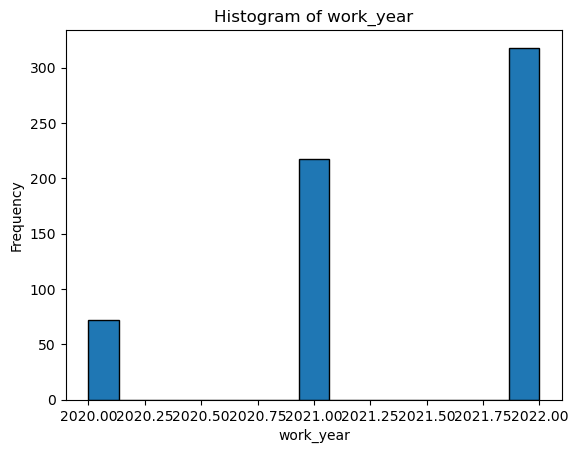

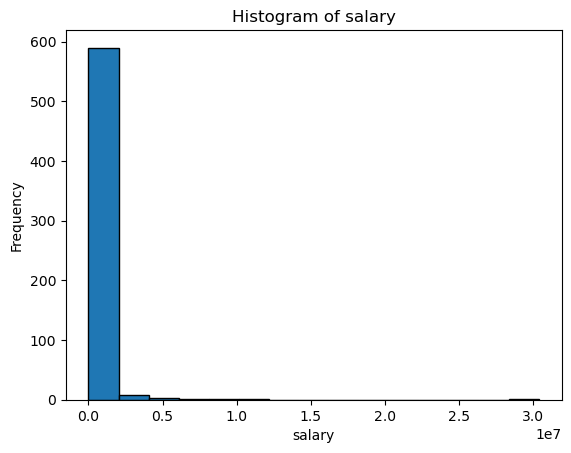

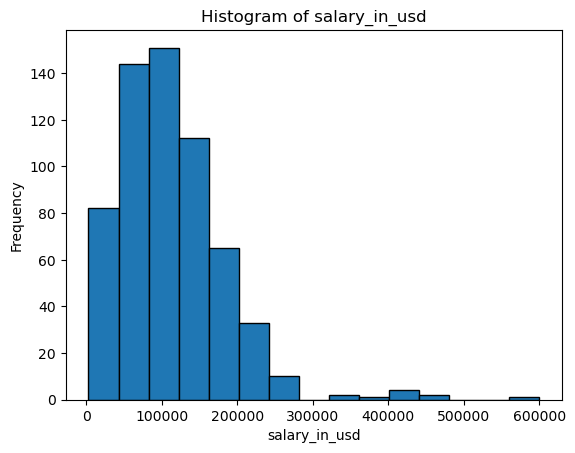

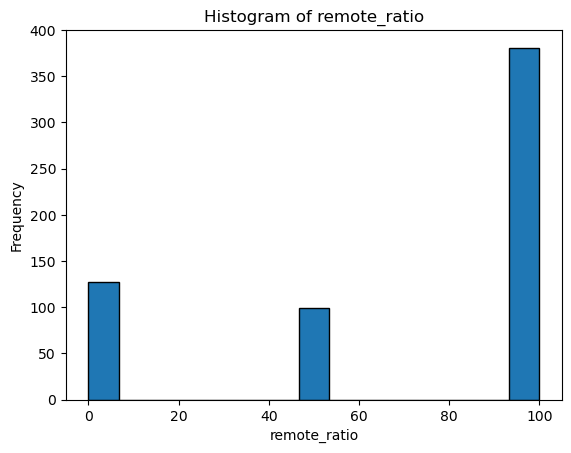

In [77]:
His_Num()

In [35]:
# check outliers 
def box_plot():
    for n in numerical_columns:
            plt.boxplot(ds[n])

      # Adding labels and title
            plt.xlabel(n)
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {n}')

          # Display the histogram
            plt.show()

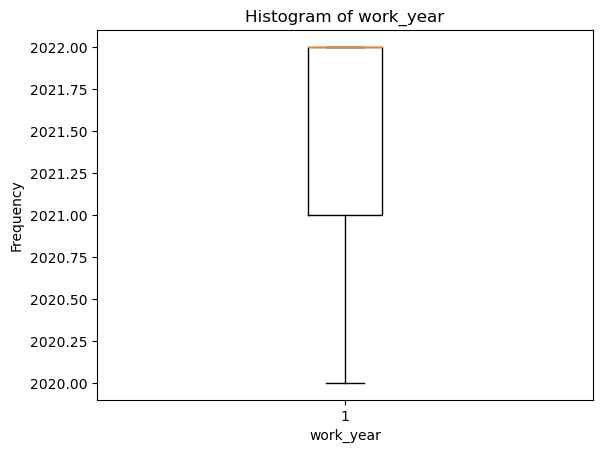

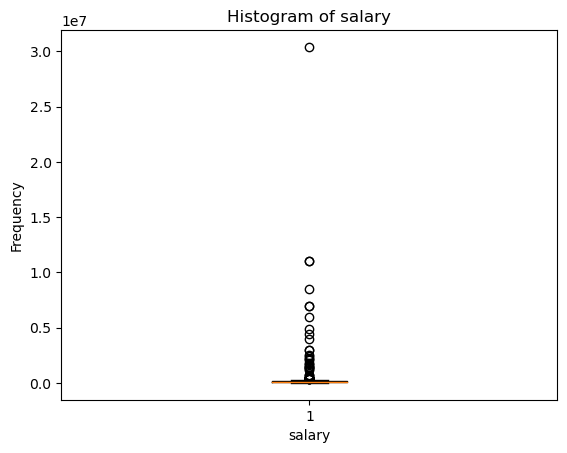

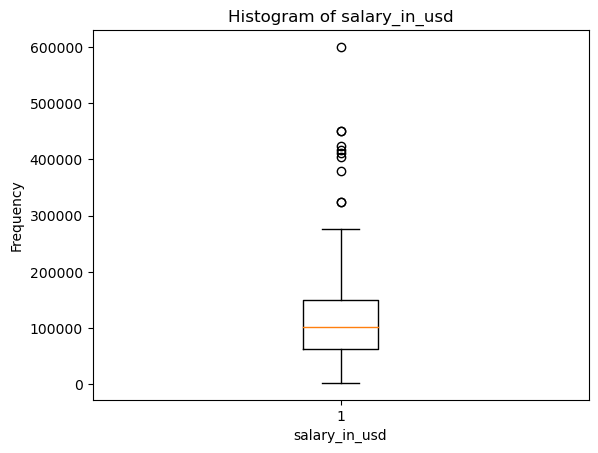

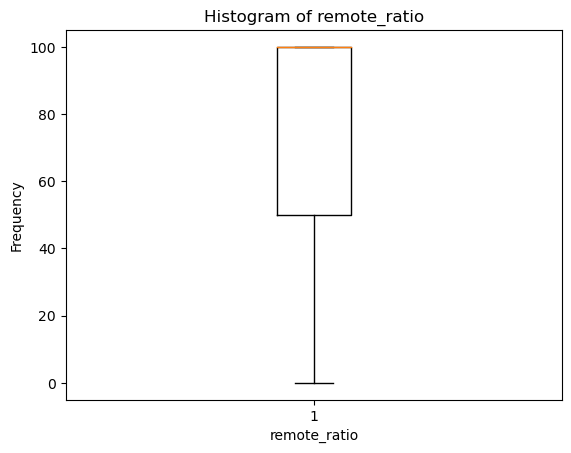

In [36]:
box_plot()

In [37]:
# check from relationshipe between salary and others 
ds.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


In [38]:
ds_without_dup.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.082597,0.159326,0.058879
salary,-0.082597,1.000000,-0.083728,-0.012279
salary_in_usd,0.159326,-0.083728,1.000000,0.122849
remote_ratio,0.058879,-0.012279,0.122849,1.000000


<AxesSubplot:>

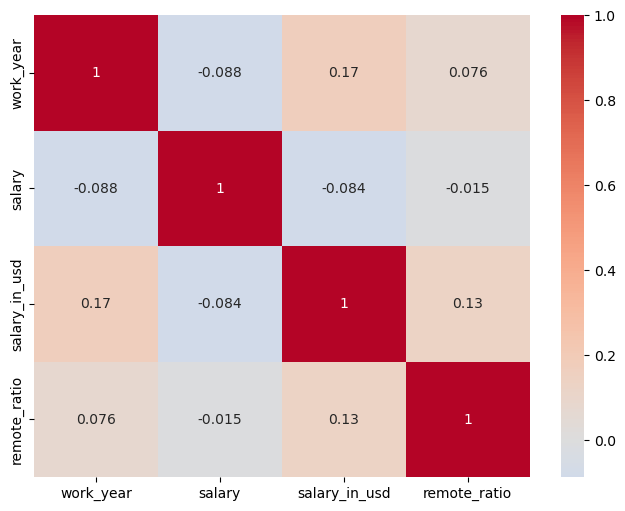

In [39]:
# Calculate the correlation matrix
correlation_matrix = ds.corr()

plt.figure(figsize=(8, 6))
# annot = True -> means appare the number in box
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

In [48]:
# feature with target 
def scat_plot_s():
    for i in numerical_columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(ds[i], ds['salary'], c='blue', marker='o')

      # Adding labels and title
        plt.xlabel(i)
        plt.ylabel('salary')
        plt.title(f'Relation between the {i} and salary')

      # Display the scatter plot
        plt.show()

In [50]:
def scat_plot_su():
    for i in numerical_columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(ds[i], ds['salary_in_usd'], c='blue', marker='o')

      # Adding labels and title
        plt.xlabel(i)
        plt.ylabel('salary_in_usd')
        plt.title(f'Relation between the {i} and salary_in_usd')

      # Display the scatter plot
        plt.show()

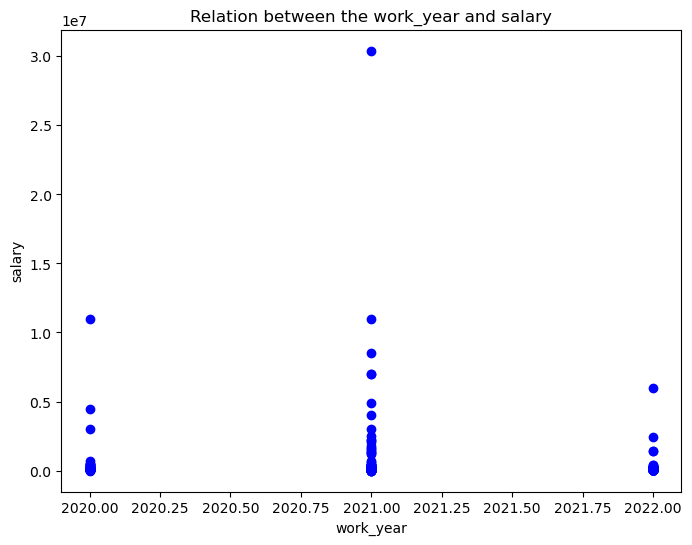

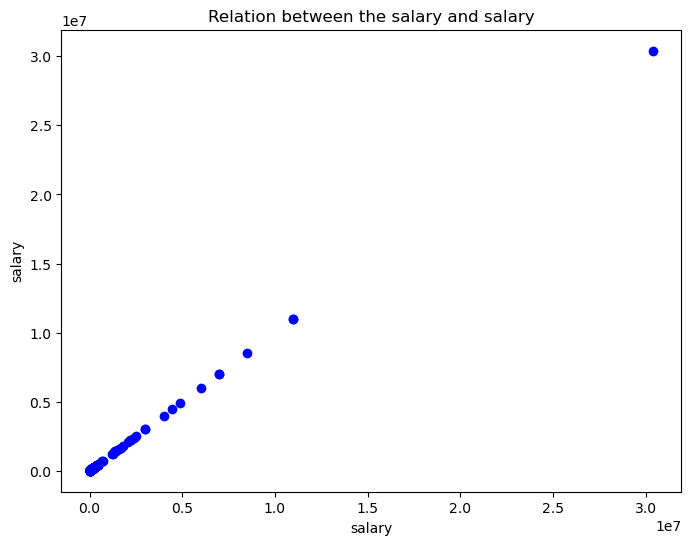

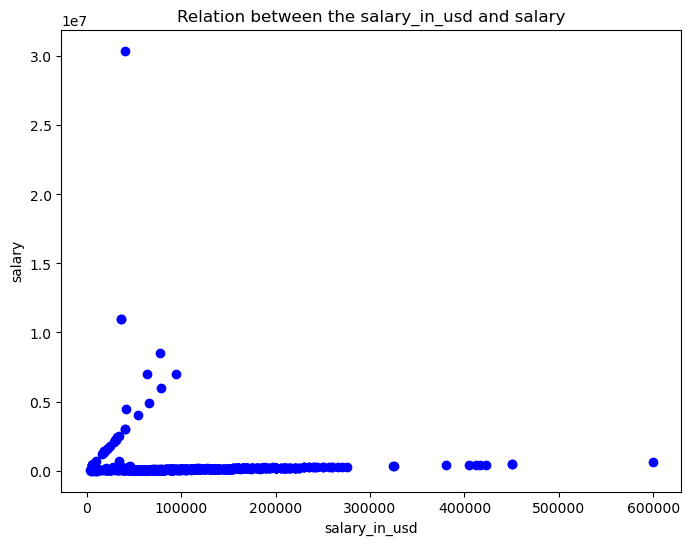

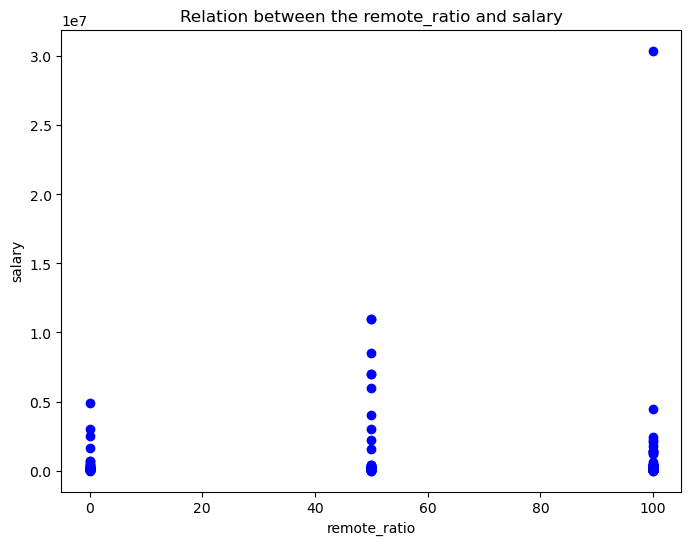

In [51]:
scat_plot_s()

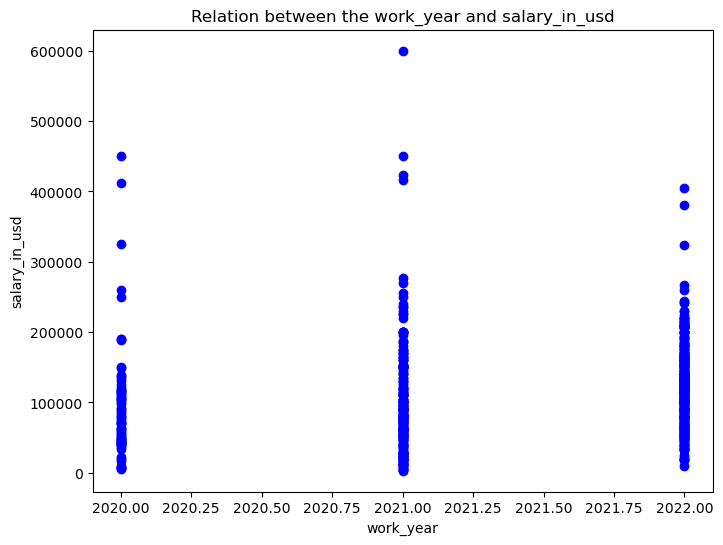

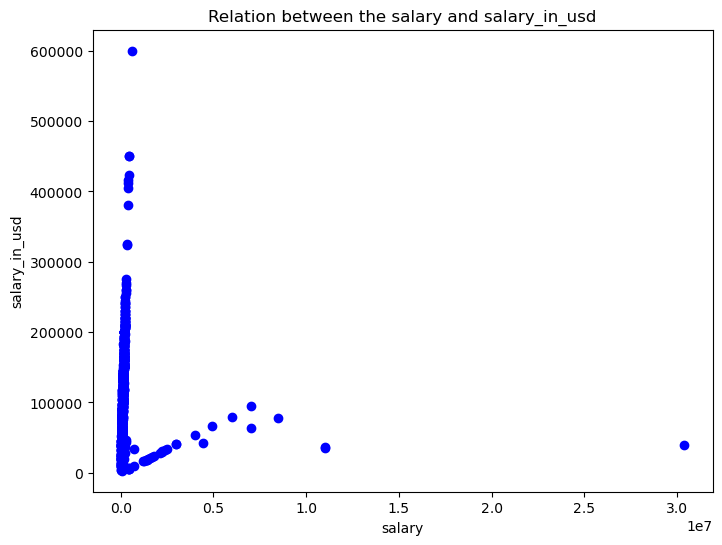

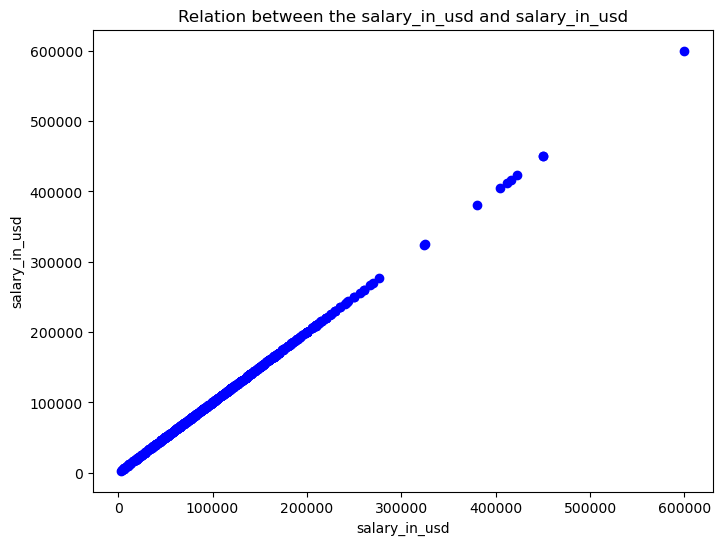

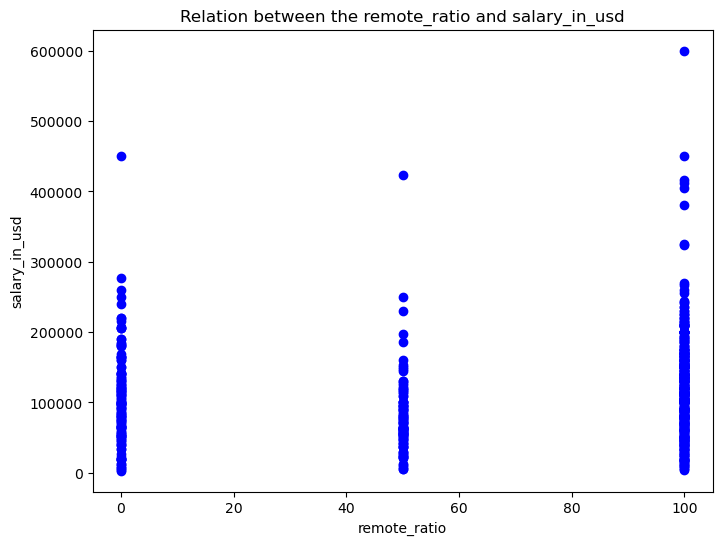

In [53]:
scat_plot_su()

In [100]:
def remove_outliers(data, column, threshold= 0.001):
    """
    Remove outliers from the data using the Interquartile Range (IQR) method.
    
    Args:
        data (pandas.DataFrame): Input data.
        column (str): Name of the column in the data containing the values to analyze.
        threshold (float): IQR threshold to identify outliers.
                           Data points outside the range [Q1 - threshold * IQR, Q3 + threshold * IQR]
                           will be considered outliers. Default is 1.5.
    
    Returns:
        pandas.DataFrame: Data with outliers removed.
    """
    # Calculate the quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the outlier boundaries
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Filter the data to remove outliers
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return cleaned_data

In [103]:
remove_outliers(ds, "salary")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [104]:
remove_outliers(ds, 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


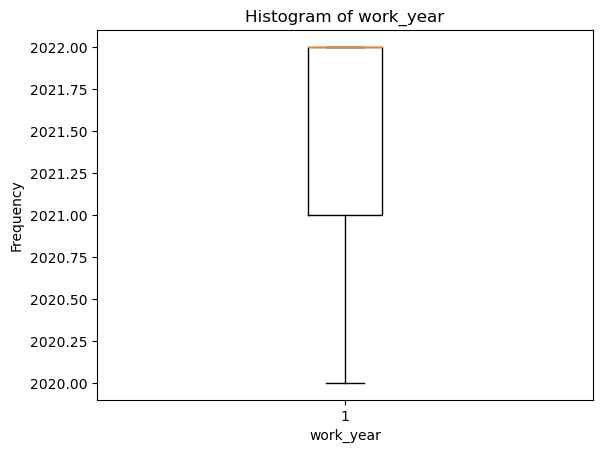

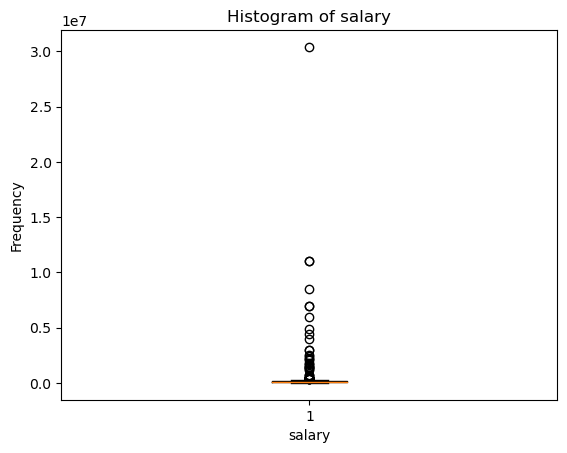

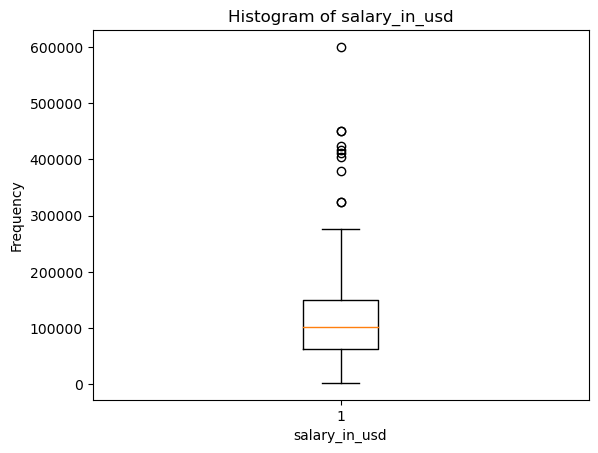

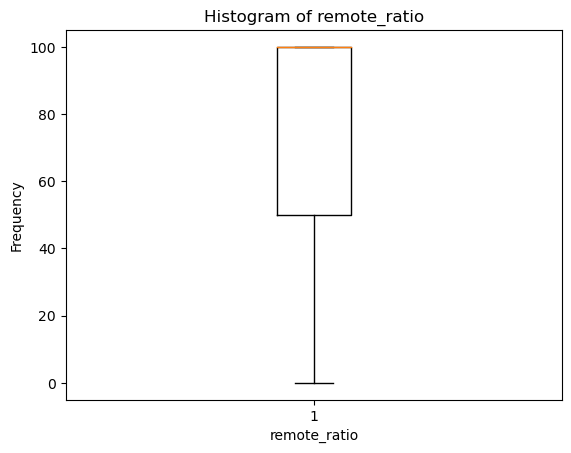

In [105]:
box_plot()

# Categorical data

In [107]:
categorical_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [108]:
Cat_Viwe()

experience_level :
---------------- 
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
the unique value is : ['MI' 'SE' 'EN' 'EX']
the number of unique value is : 4
employment_type :
---------------- 
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
the unique value is : ['FT' 'CT' 'PT' 'FL']
the number of unique value is : 4
job_title :
---------------- 
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of 

In [125]:
def pie_plot():
    for i in categorical_columns:
        cut_counts = ds[i].value_counts()
        plt.figure(figsize = (8, 8))
        plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140)
# Create a pie plot
# Equal aspect ratio ensures that pie is drawn as a circle.'
        plt.axis('equal')
# Adding a title
        plt.title(i)
# Display the pie plot
        plt.show()

 

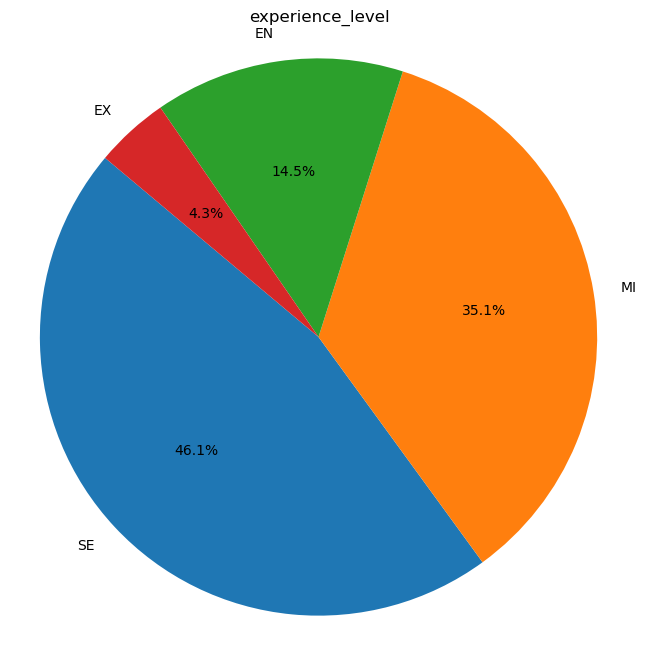

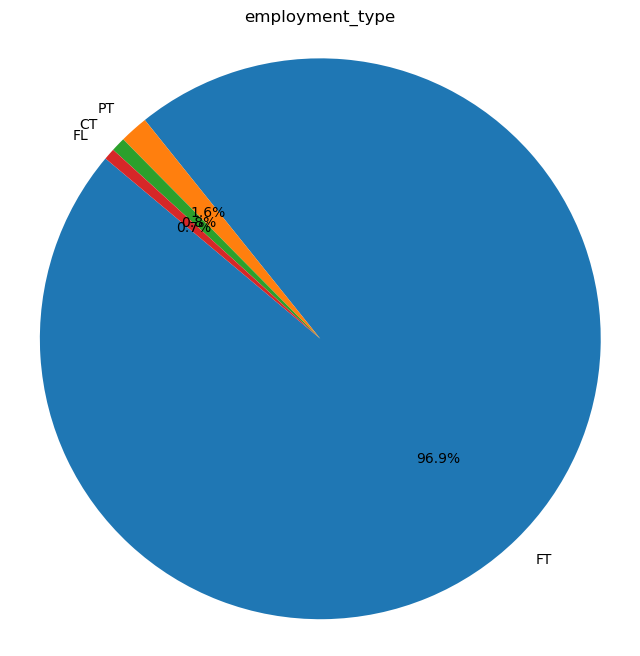

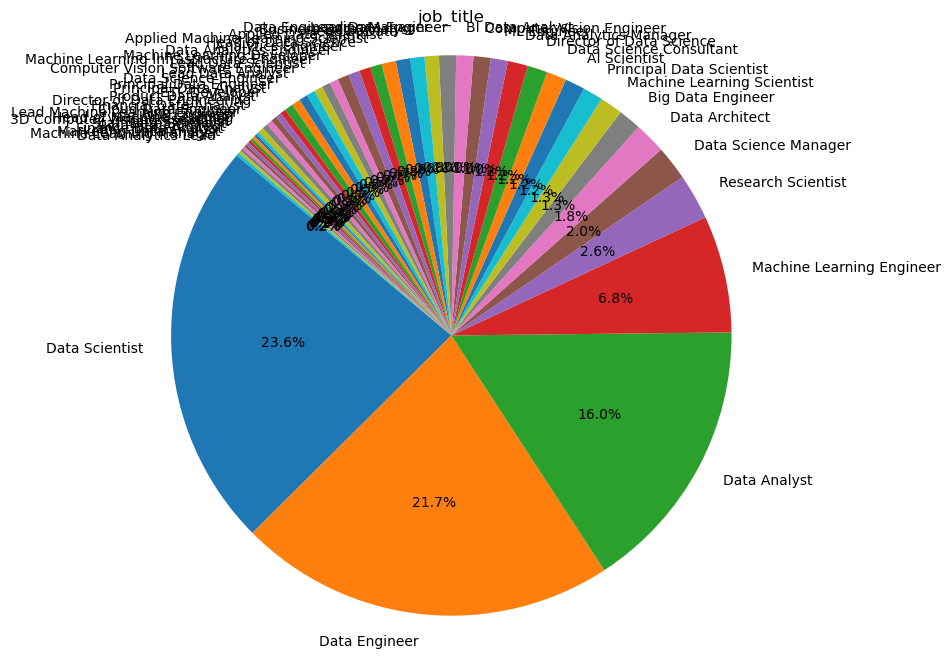

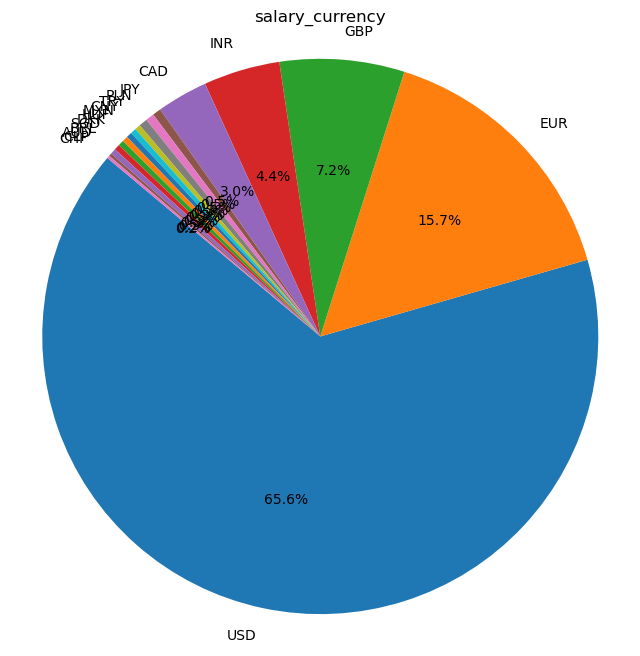

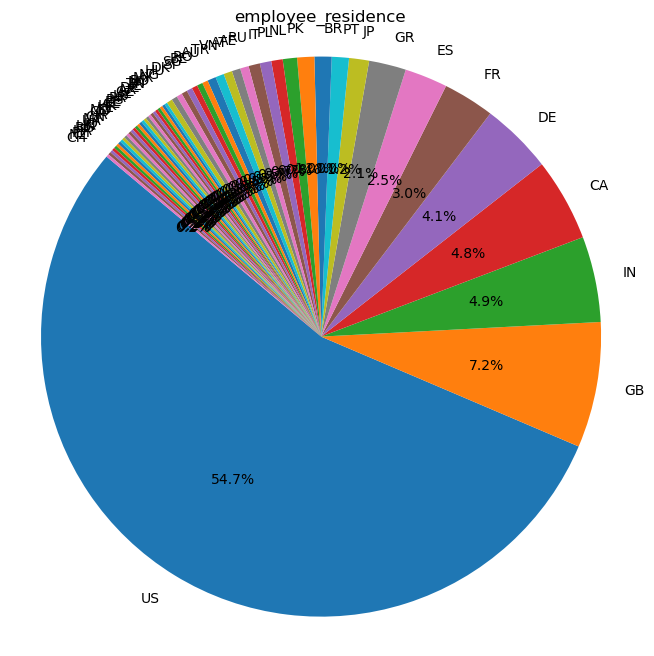

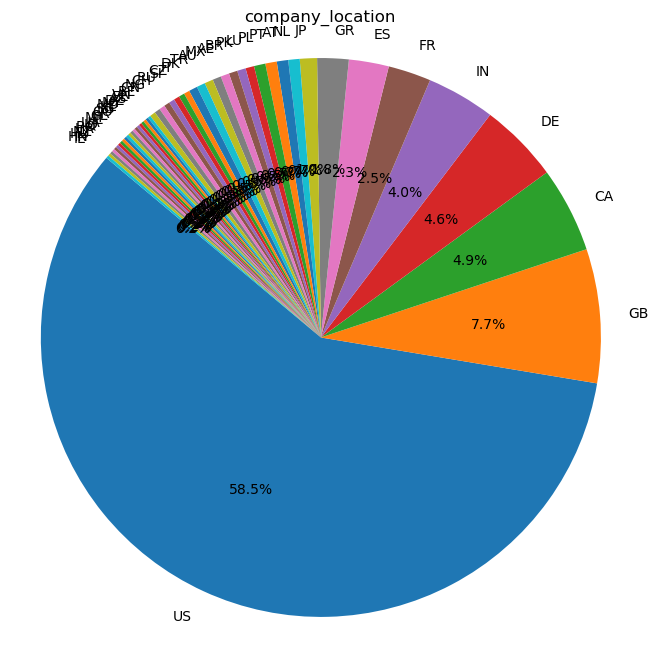

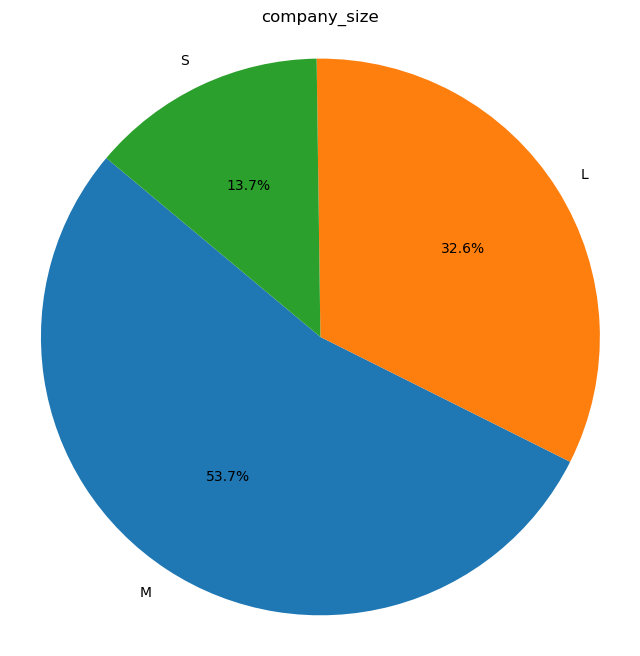

In [126]:
pie_plot()

In [127]:
# comper taget and categrocal data 
def comper():
    for i in categorical_columns:
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=i, y="salary", data=ds)
        plt.title(f"{i} Box Plot of Numerical Target by Categorical Feature")
        plt.xticks(rotation=45)
        plt.show()

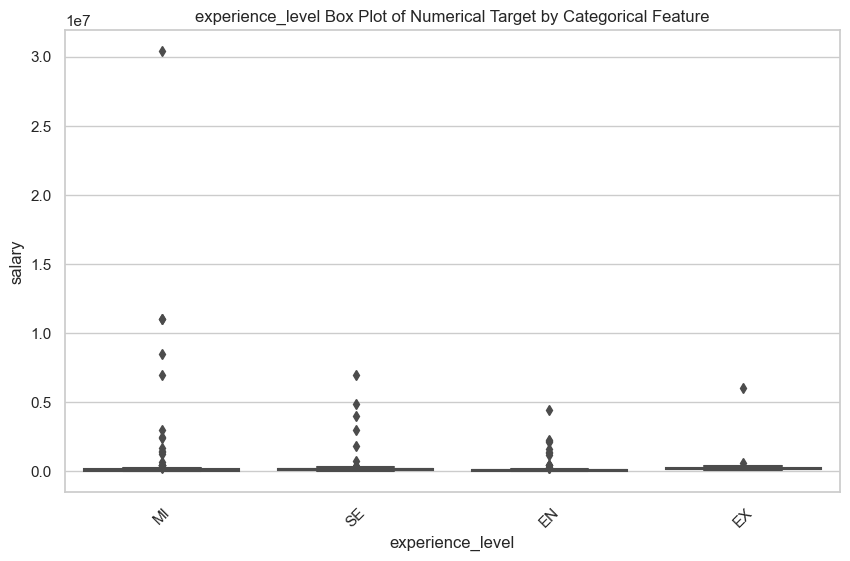

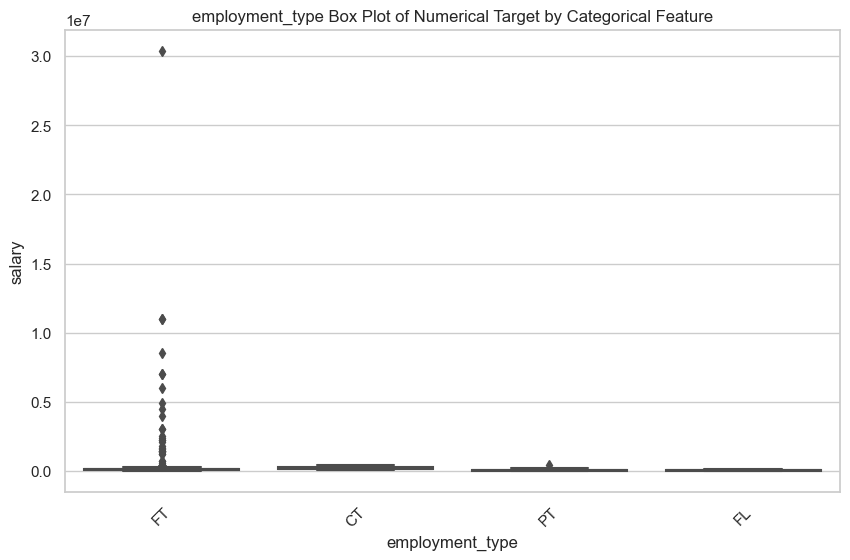

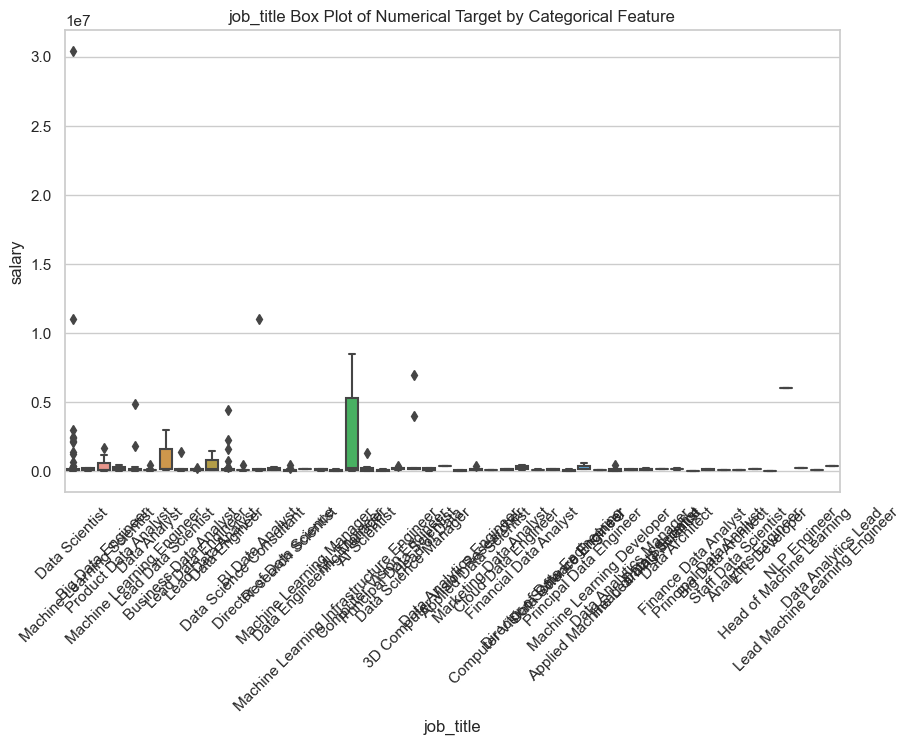

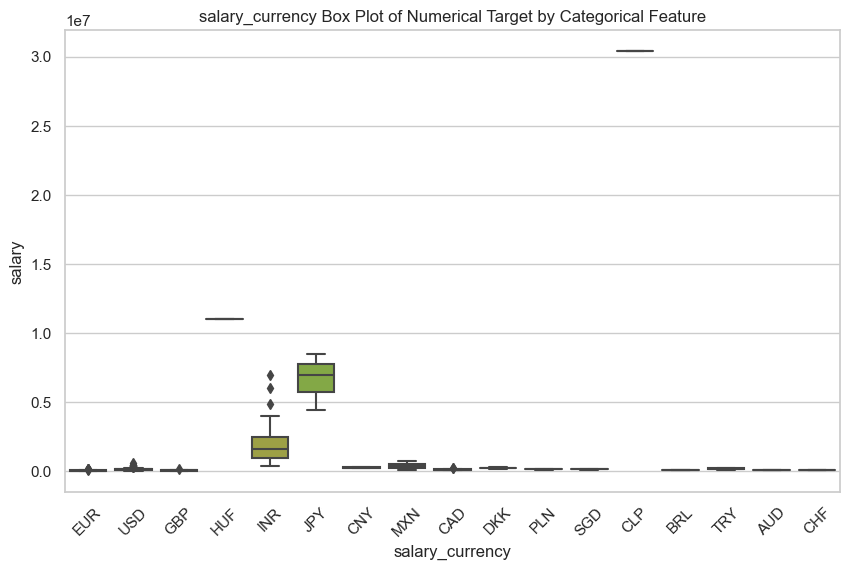

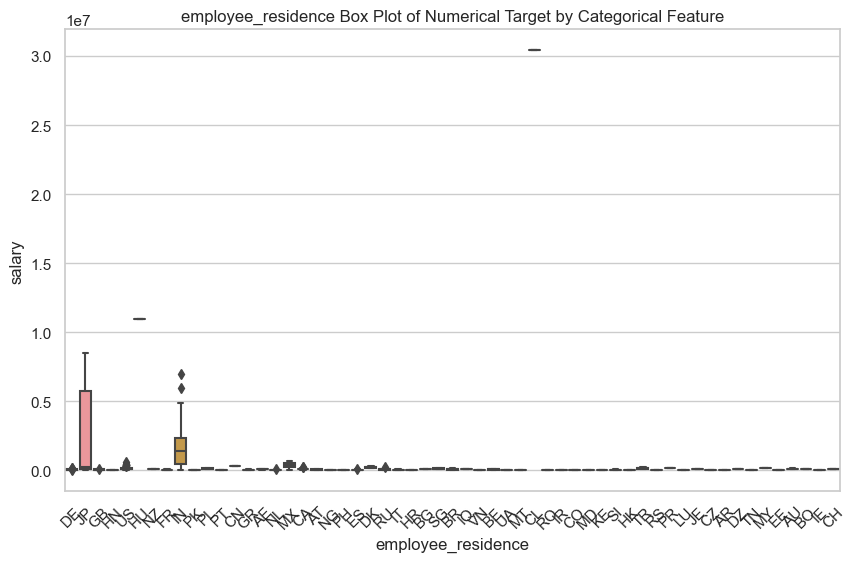

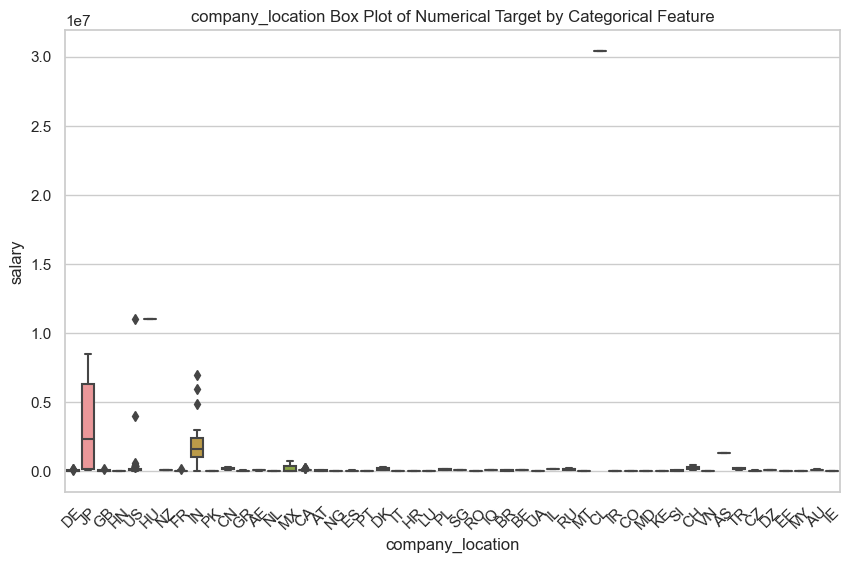

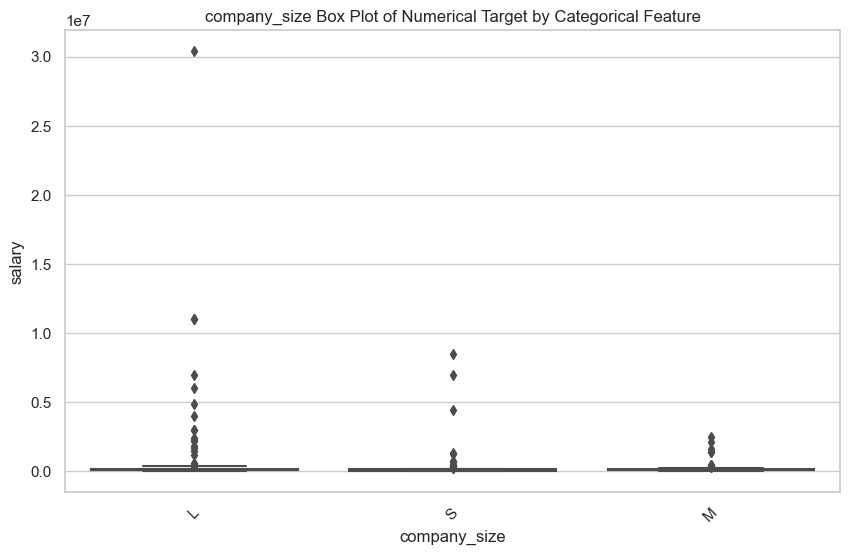

In [128]:
comper()

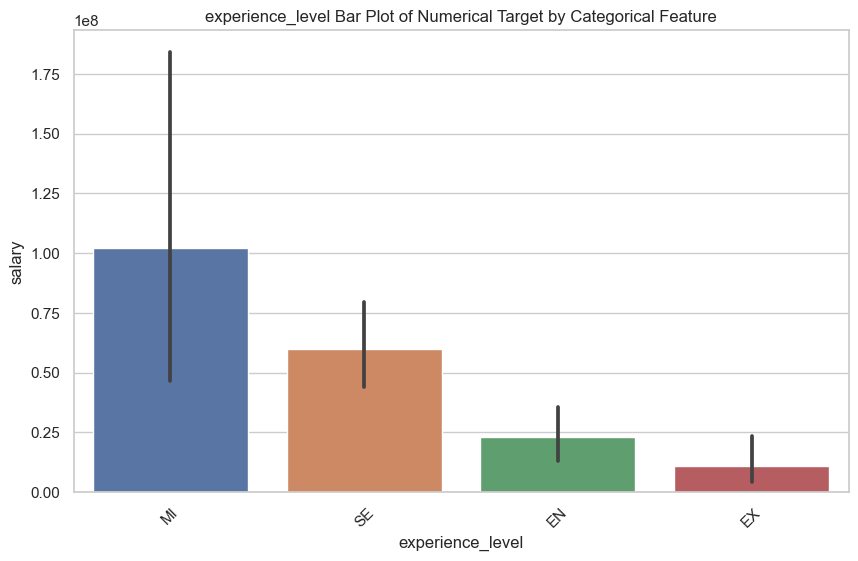

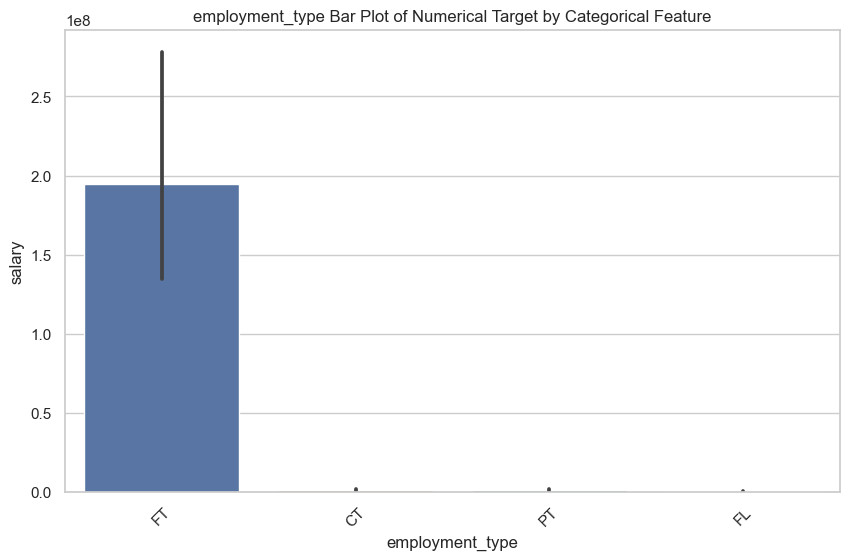

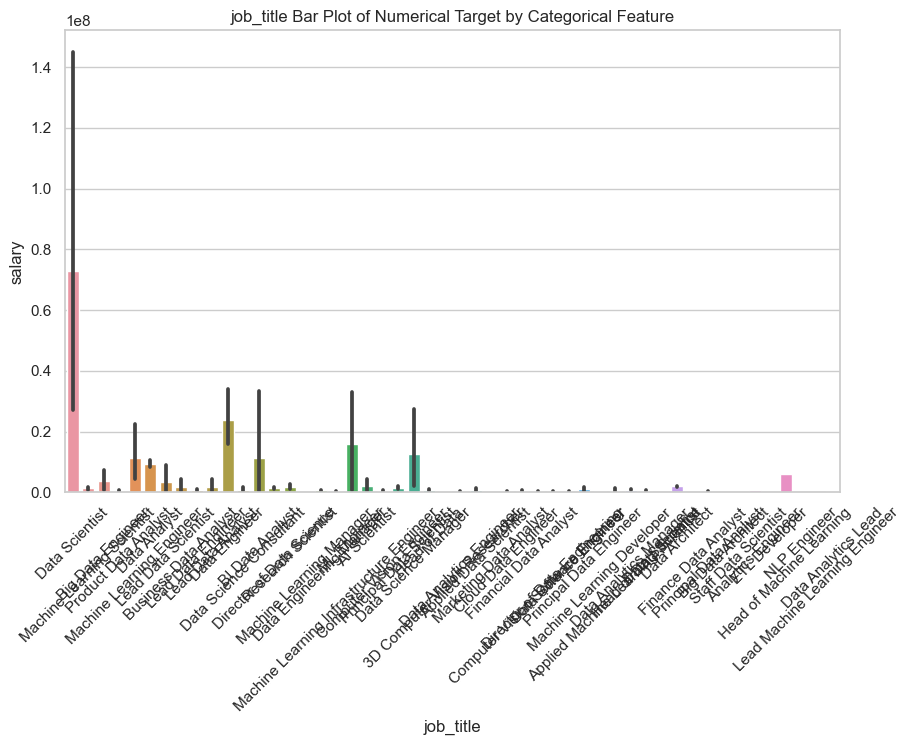

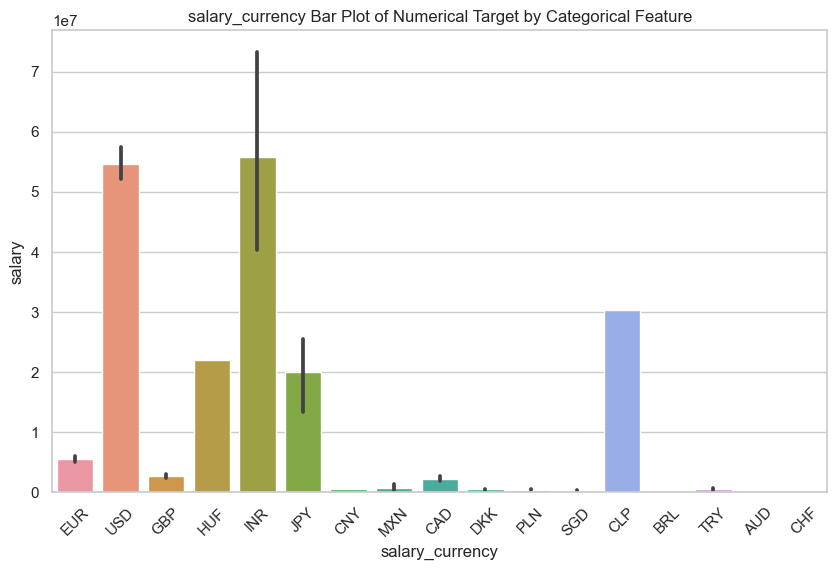

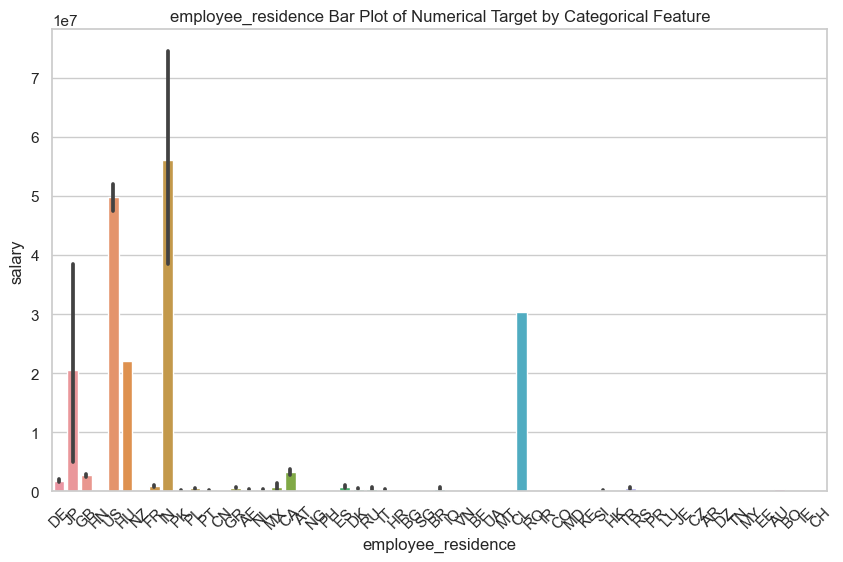

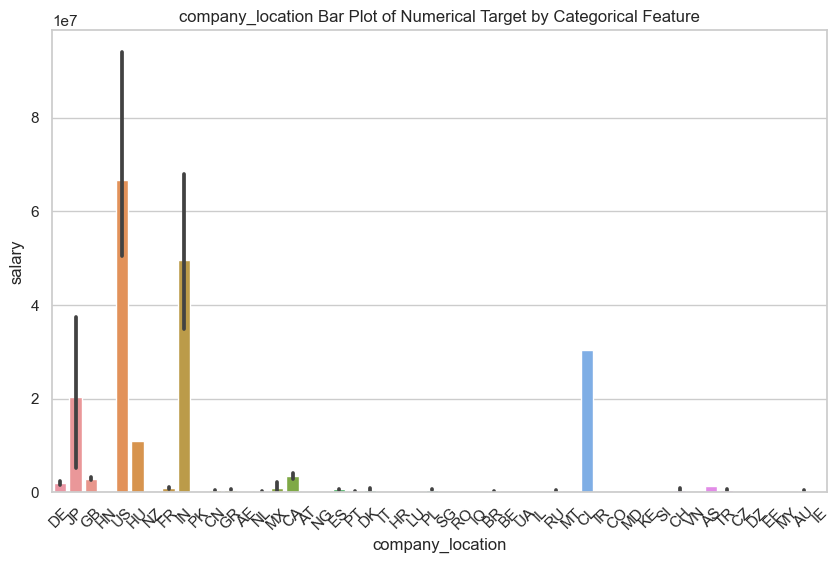

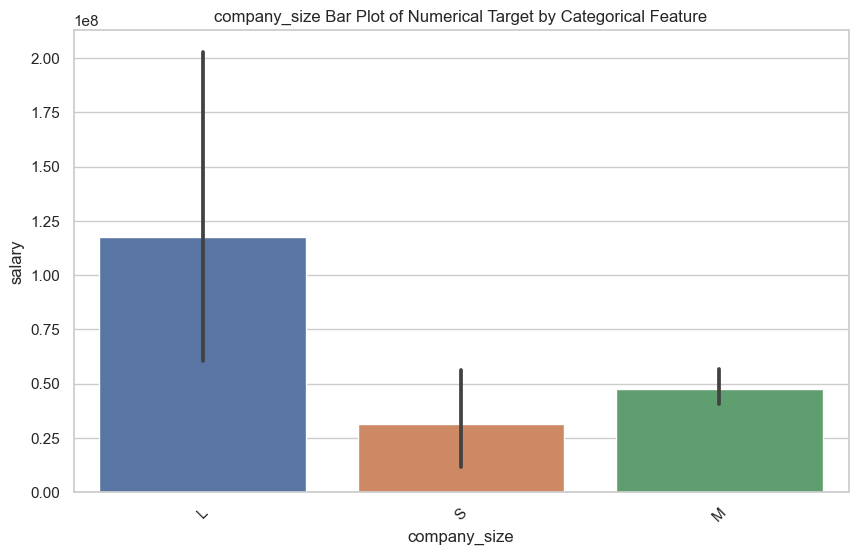

In [129]:
for i in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=i, y="salary", data=ds, estimator=sum)
    plt.title(f"{i} Bar Plot of Numerical Target by Categorical Feature")
    plt.xticks(rotation=45)
    plt.show()

# insight of the data

- target -> salary

1) not have missing value 

2) I have categorical more then numerical columns 

3) I have duplicated data but I don't removed becuse I thought if remove it do something in data 

4) from the plot the salary and salary_in_usd in skewd to right although the remote_ratio and work_year skewd to left 

5) during the boxplot the remote_ratio and work_year don't have outlires 

6) since the correlation between salary and other is weeked then correlation between salary_in_usd and other, I will assume the salary_in_usd is -> target

7) I am try to remove the outlier but not effective appearing 

8) the categroical data give me more detials about data as usd currency is more used because the employee and companies from us

9) more specialty in data science 

10) companies size is mostly 50 to 250 emplyee 